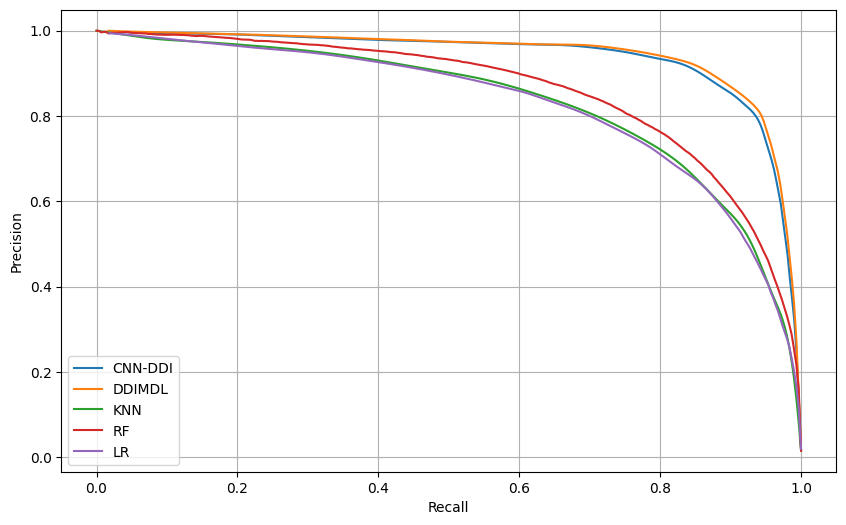

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


urls = ['https://drive.google.com/uc?id=1vt_y5UngKguj4E5YC6VwFD1ezRHMj2LO',
        'https://drive.google.com/uc?id=1t4u6iK0GdXlN1KzuV4u7n6_p40V-txg7',
        'https://drive.google.com/uc?id=1bKxLJrHqIxfhuEorJV5ulcp9V39IlLwO',
        'https://drive.google.com/uc?id=1Xb6ilEmwr1l1ZbbwkpAvHF5KzFhnLVf3',
        'https://drive.google.com/uc?id=1QO57P7pn3dMzawF1GrDgsyi5gK_GlMa9',
        ]

labels = ['CNN-DDI',
          'DDIMDL',
          'KNN',
          'RF',
          'LR'
          ]

plt.figure(figsize=(10, 6))

for url, label in zip(urls, labels):
  data_df = pd.read_csv(url)
  deduplicated_data = data_df.groupby('Recall')['Precision'].max().reset_index()
  data_np = deduplicated_data.to_numpy()

  recall = data_np[:, 0]
  precision = data_np[:, 1]

  spline = make_interp_spline(recall, precision)
  recall_smooth = np.linspace(recall.min(), recall.max(), 300)
  precision_smooth = spline(recall_smooth)

  plt.plot(recall_smooth, precision_smooth, label=label)

plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

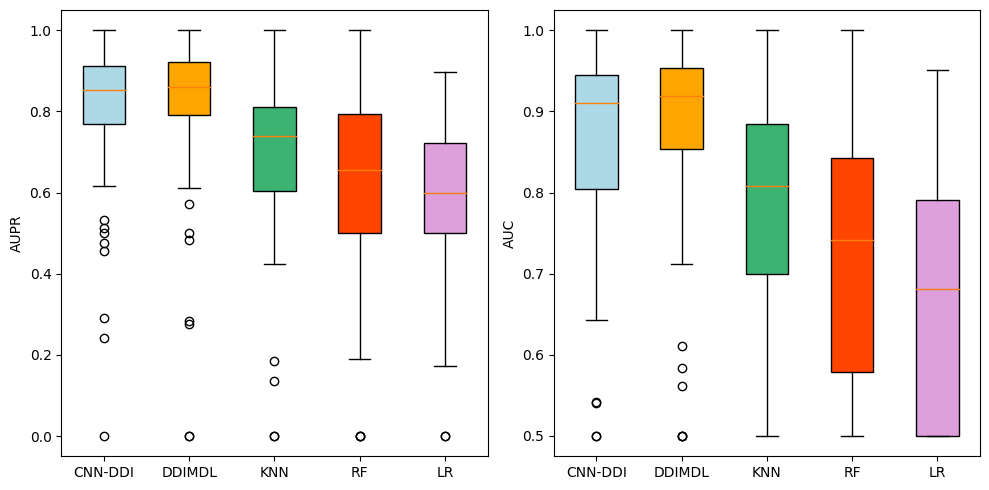

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.figure(figsize=(10, 5))
urls = ['https://drive.google.com/uc?id=1VX5fhqoVxTvRb44bQbX1NaGyq6V3XPz8',
        'https://drive.google.com/uc?id=1cGHSvMBIwITccBkGNECZxFWk7X-XVBij',
        'https://drive.google.com/uc?id=1jrL7LiNDnRlQzipBiMpQklZVL_Y0279s',
        'https://drive.google.com/uc?id=1Y0HDXgshJgep-7m0y1GbPScMgmKqIMMB',
        'https://drive.google.com/uc?id=1Nj8kRGY8phKzwKMdg2vm3nV1_4fxea4l'
        ]

labels = ['CNN-DDI',
          'DDIMDL',
          'KNN',
          'RF',
          'LR'
          ]
positions = [1,2,3,4,5]
colors = ['lightblue', 'orange', 'mediumseagreen', 'orangered', 'plum']

aupr_data = []
auc_data = []
for url in urls:
  aupr_data.append(pd.read_csv(url, header=None).iloc[:,1].values)
  auc_data.append(pd.read_csv(url, header=None).iloc[:,2].values)


plt.subplot(1, 2, 1)
box = plt.boxplot(aupr_data, patch_artist=True)
for patch, color in zip(box['boxes'], colors) : patch.set_facecolor(color)
plt.xticks(positions, labels)
plt.ylabel('AUPR')

plt.subplot(1, 2, 2)
box = plt.boxplot(auc_data, patch_artist=True)
for patch, color in zip(box['boxes'], colors) : patch.set_facecolor(color)
plt.xticks(positions, labels)
plt.ylabel('AUC')

plt.tight_layout()
plt.show()